<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/cnn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN-Keras

In [0]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

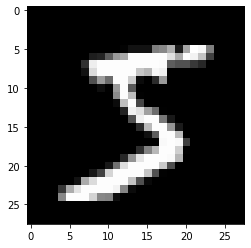

In [25]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.gray()
plt.imshow(X_train[0], cmap='gray')

In [26]:
#check image shape
X_train[0].shape

(28, 28)

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [28]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten()) # Unidimensional Array
model.add(Dense(10, activation='softmax'))

In [30]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                15690     
Total params: 34,794
Trainable params: 34,794
Non-trainable params: 0
__________________________________________________

In [31]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 157us/step - loss: 1.7200 - acc: 0.8615 - val_loss: 0.0818 - val_acc: 0.9735
Epoch 2/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.0736 - acc: 0.9778 - val_loss: 0.0747 - val_acc: 0.9773
Epoch 3/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0576 - acc: 0.9820 - val_loss: 0.0735 - val_acc: 0.9772
Epoch 4/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.0479 - acc: 0.9850 - val_loss: 0.0676 - val_acc: 0.9791
Epoch 5/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.0426 - acc: 0.9865 - val_loss: 0.0541 - val_acc: 0.9842


In [32]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[7.0926553e-16, 1.6253610e-13, 3.7340389e-09, 1.7332490e-10,
        1.2542368e-16, 4.1438996e-13, 5.9815088e-23, 9.9999964e-01,
        1.2121215e-13, 3.2552285e-07],
       [4.4676103e-06, 7.7335138e-10, 9.9999428e-01, 1.8781081e-10,
        2.1024395e-13, 1.0475938e-14, 1.3569370e-06, 2.3782786e-15,
        2.1054342e-08, 1.7597288e-17],
       [3.8297301e-08, 9.9984956e-01, 5.0621264e-07, 7.9018898e-09,
        1.1132411e-05, 4.2670366e-05, 4.5562203e-05, 1.5363670e-06,
        4.8692764e-05, 2.6993885e-07],
       [9.9999976e-01, 7.1326892e-20, 1.0762897e-09, 6.4340921e-14,
        4.5625674e-14, 5.7093371e-12, 2.9566331e-07, 2.4255069e-13,
        8.3465274e-10, 3.4264749e-09]], dtype=float32)

In [33]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
pesos = model.layers[0].get_weights()[0]
pesos.shape
pesos[:,:,0,0] #first weight generated.

array([[ 0.00384186,  0.00469512, -0.1264703 ],
       [ 0.02069099, -0.02208626, -0.02478114],
       [ 0.03099385, -0.10061107, -0.01898686]], dtype=float32)